<a href="https://colab.research.google.com/github/amyush/Audio-steganography/blob/main/Audio_steganography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setting up the environment**

In [1]:
# Cloning the git repository to read the files
!git clone https://github.com/amyush/Audio-steganography.git

Cloning into 'Audio-steganography'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 42 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (42/42), done.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wave

# **Custom Functions**

In [3]:
# Function to convert a string to its binary representation
def stringToBinary(a):
  l=[]
  res = ''.join(format(ord(i), '08b') for i in a)
  return res

# Function to convert a binary number to its respective string
def binaryToString(a):
  return chr(binaryToInt(a))

# Function to convert a integer to its binary representation
def integerToBinary(a):
  return int(bin(a)[2:])

# Function to convert a binary to its integer value
def binaryToInt(binary): 
    int_val, i, n = 0, 0, 0
    while(binary != 0): 
        a = binary % 10
        int_val = int_val + a * pow(2, i) 
        binary = binary//10
        i += 1
    return int_val

# **Steganography**

## **Hiding the data**

In [4]:
# Function to encode the message within an audio file
def encodeMessage(filename, key, message):
    if(len(filename) == 0):
        return 'Filename cannot be NULL. Provide a valid filename.'
    if(len(key) == 0):
        return 'Key cannot be NULL. Provide a key of atleast length 2.'
    if(len(message) == 0):
        return 'Message cannot be NULL. Provide a message of atleast length 1.'

    # Base path of the code
    audioPath = "Audio-steganography/"

    # Reading the audio file as read-only
    audioFile = wave.open(audioPath + filename, 'rb')
        
    # Extract audio frame as byte array
    audioBytes = bytearray(list(audioFile.readframes(audioFile.getnframes())))
    
    # Declaring a delimeter
    delimeter = "#@#@#@"
    length = len(audioBytes)

    # Converting key and message to its binary representation
    # Here, custom function is used for conversion.
    binKey = stringToBinary(key)
    binMsg = stringToBinary(message + delimeter)
    lenBinKey = len(binKey)
    lenBinMsg = len(binMsg)

    # Pointer to keep track of current key bit
    index = -1
    # Pointer to keep track of current message bit
    count = 0

    # New audio file where the message is encoded
    encodedAudioBytes = audioBytes

    # Hiding the message in the audio file
    for j in range(0, length):
        index = index + 1;

        # Looping over key bits using modulus function to accomodate any length of message
        if((int)(binKey[index%lenBinKey]) == 1):
            # If the count is less, that means not all message is yet encoded
            if(count < lenBinMsg):

                # Storing the current frame of the file in binary
                currentFrame = integerToBinary(audioBytes[j])
                
                # Changing the last bit of the current frame according to the message current bit
                modifiedFrame = ((int)(currentFrame/10)*10) + (int)(binMsg[count])

                # Storing the modified frame in the audio
                encodedAudioBytes[j] = binaryToInt(modifiedFrame);

                # Increasing the pointer to the message bit
                count = count + 1;
            # Else, all the message alongwith delimeter is encoded. Thus, breaking out of loop
            else:
                break;

    # Coverting the encoded audio file to bytes
    encodedAudioBytes = bytes(encodedAudioBytes)
    # Writing the audio file to the base path
    newaudio = wave.open(audioPath + "encodedAudio.wav", "wb")
    # Setting the params of the original file to the encoded file
    newaudio.setparams(audioFile.getparams())
    # Writing frames of original audio to the encoded audio file
    newaudio.writeframes(encodedAudioBytes)

## **Extracting the data**

In [62]:
# Function to extract the message from an audio file
def extractMessage(key):
    # Base path of the code
    audioPath ="Audio-steganography/"

    # Reading the audio file as read-only
    audioFile = wave.open(audioPath + 'encodedAudio.wav', 'rb')
    
    # Extract audio frame as byte array
    audioBytes = bytearray(list(audioFile.readframes(audioFile.getnframes())))
    length = len(audioBytes)

    # Declaring a delimeter
    delimeter = "#@#@#@"

    # Converting key to its binary representation
    # Here, custom function is used for conversion.
    if(len(key) == 0):
        return 'key cannot be NULL. Provide a valid key of atleast length 2.'

    binKey = stringToBinary(key)
    lenBinKey = len(binKey)

    # Pointer to keep track of current key bit
    index = -1

    # Each character is of 8 bytes.
    # Counter to keep track of length of current frame value
    extractedBitLength = 0

    # Variable to hold the extracted bits
    extractedBit = 0

    # Extracted message
    extractedMessage = ""

    # Hiding the message in the audio file
    for j in range(0, length):
        index += 1

        # Looping over key bits using modulus function to accomodate any length of message
        if((int)(binKey[index%lenBinKey]) == 1):
            
            # Converting the current frame to binary
            currentFrame = integerToBinary(audioBytes[j])

            # Updating the extracted bit
            extractedBit = extractedBit * 10 + currentFrame%10
            extractedBitLength += 1

            # When the length of the extracted bit is 8, convert the bits to string.
            # This gives 1 extracted character.
            if(extractedBitLength == 8):

                # Converting the extracted bit to its character representation, and adding to the extracted message.
                extractedMessage += binaryToString(extractedBit)

                # Re-set the length of the extracted bit length to 0
                extractedBitLength = 0

                # Re-set the extracted bit to 0 for the next character
                extractedBit = 0

                # If the extracted message has the delimeter, it means the message has been extracted completely.
                # Thus we return the message
                if("#@#@#@" in extractedMessage):
                    # Return the message by leaving the last 6 characters of the delimeter
                    return [extractedMessage[:-6], j]
              

# **Results**

## **Encode the message**

In [6]:
# Input for the filename
fileName = input("Enter the filename: (eg- cover_audio.wav)")
# Input for the key to be used
key = input("Enter the key:")
# Input for the message to be encoded
message = input("Enter the message to be hidden:")

# Function call to encode the message
encodeMessage(fileName, key, message)

Enter the filename: (eg- cover_audio.wav)cover_audio.wav
Enter the key:awdawd
Enter the message to be hidden:auahwdhahwhdawd


## **Extract the message**

In [63]:
# Input for the key to be used
key = input("Enter the same key which was used to encode the message:")

# Function call to extract the message
extractedMessage, lastIndex = extractMessage(key)

print('extractedMessage = {}'.format(extractedMessage))

Enter the same key which was used to encode the message:awdawd
extractedMessage = auahwdhahwhdawd


# **Plotting the sounds**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  app.launch_new_instance()


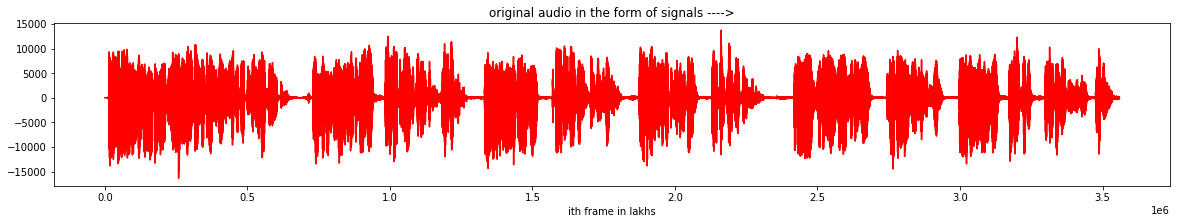

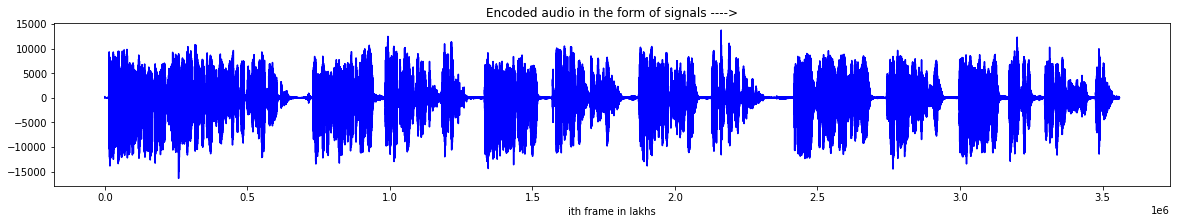

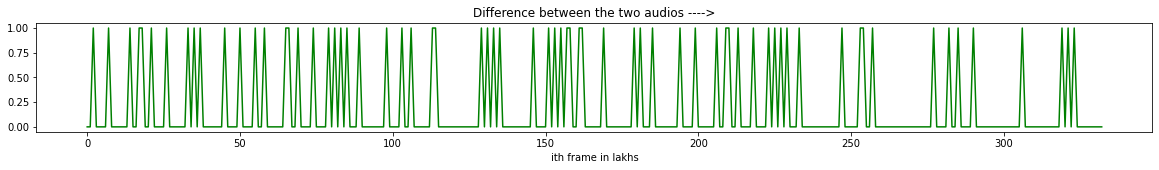

In [88]:
# Reading the orignal image
originalAudio = wave.open("Audio-steganography/cover_audio.wav", "r")
# Reading the orignal image
encodedAudio = wave.open('Audio-steganography/encodedAudio.wav', 'r')

# Reading each frame of the both sounds
originalAudioFrames = originalAudio.readframes(-1)
encodedAudioFrames = encodedAudio.readframes(-1)

# Creating the difference between the two sounds
diff = [0] * lastIndex
for i in range(lastIndex):
    diff[i] = integerToBinary(encodedAudioFrames[i]) - integerToBinary(originalAudioFrames[i])

originalAudioFrames = np.fromstring(originalAudioFrames, "Int16")
encodedAudioFrames = np.fromstring(encodedAudioFrames, "Int16")

# Plotting the original audio
plt.figure(figsize=(20,3))
plt.plot(originalAudioFrames,'r')
plt.title("original audio in the form of signals ---->")
plt.xlabel('ith frame in lakhs')

# Plotting the encoded audio
plt.figure(figsize=(20,3))
plt.plot(encodedAudioFrames,'b')
plt.title("Encoded audio in the form of signals ---->")
plt.xlabel('ith frame in lakhs')

# Plotting the difference in the origianl and encoded audio
plt.figure(figsize=(20,2))
plt.plot(diff[:lastIndex],'g')
plt.title("Difference between the two audios ---->")
plt.xlabel('ith frame in lakhs')
plt.show()